# RANDOM FOREST FOR STOCK PRICE PREDICTION

Random Forest is a powerful machine learning algorithm widely used for classification and regression tasks. In finance, it has been successfully applied for stock price prediction due to its ability to handle large amounts of data and its flexibility in handling a wide range of variables.In the case of stock price prediction, Random Forest can be used to analyze a wide range of factors that influence stock prices, such as company financials, macroeconomic indicators, news sentiment, and technical indicators. The algorithm can then identify the most important variables and use them to make predictions of future stock prices.

One advantage of Random Forest is that it can handle non-linear relationships between variables, making it well-suited for predicting stock prices that are influenced by a wide range of factors. Additionally, Random Forest is less prone to overfitting compared to other machine learning algorithms, which is an important consideration when working with financial data.

In [1]:
# Import the required packages
import yfinance as yf
import matplotlib.pyplot as plt
# Get all time AAPL stock data 
AAPL = yf.Ticker("AAPL")
AAPL = AAPL.history(period = "max")

/Users/teja/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# Display the Apple Dataframe
AAPL

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099722,0.100155,0.099722,0.099722,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094953,0.094953,0.094519,0.094519,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.088015,0.088015,0.087582,0.087582,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089749,0.090183,0.089749,0.089749,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.092351,0.092785,0.092351,0.092351,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2023-05-01 00:00:00-04:00,169.279999,170.449997,168.639999,169.589996,52472900,0.0,0.0
2023-05-02 00:00:00-04:00,170.089996,170.350006,167.539993,168.539993,48425700,0.0,0.0
2023-05-03 00:00:00-04:00,169.500000,170.919998,167.160004,167.449997,65136000,0.0,0.0


In [3]:
# Index of the Apple Dataframe
AAPL.index

DatetimeIndex(['1980-12-12 00:00:00-05:00', '1980-12-15 00:00:00-05:00',
               '1980-12-16 00:00:00-05:00', '1980-12-17 00:00:00-05:00',
               '1980-12-18 00:00:00-05:00', '1980-12-19 00:00:00-05:00',
               '1980-12-22 00:00:00-05:00', '1980-12-23 00:00:00-05:00',
               '1980-12-24 00:00:00-05:00', '1980-12-26 00:00:00-05:00',
               ...
               '2023-04-24 00:00:00-04:00', '2023-04-25 00:00:00-04:00',
               '2023-04-26 00:00:00-04:00', '2023-04-27 00:00:00-04:00',
               '2023-04-28 00:00:00-04:00', '2023-05-01 00:00:00-04:00',
               '2023-05-02 00:00:00-04:00', '2023-05-03 00:00:00-04:00',
               '2023-05-04 00:00:00-04:00', '2023-05-05 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=10689, freq=None)

Text(0.5, 1.0, 'Close Price of the Stock over Time')

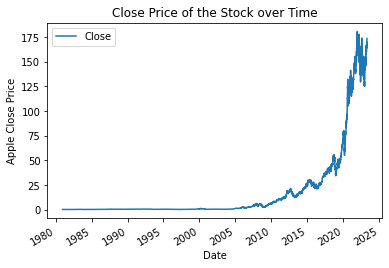

In [4]:
# Plot Between Close Price and Data
AAPL.plot.line(y="Close",use_index=True)
plt.ylabel("Apple Close Price")
plt.title("Close Price of the Stock over Time")

# Data Cleaning and Visualising the stock market data

In [5]:
# Remove the columns which are not needed
del AAPL["Dividends"]
del AAPL["Stock Splits"]

In [6]:
# New AAPL Dataframe
AAPL

,Open,High,Low,Close,Volume
Date,,,,,
1980-12-12 00:00:00-05:00,0.099722,0.100155,0.099722,0.099722,469033600
1980-12-15 00:00:00-05:00,0.094953,0.094953,0.094519,0.094519,175884800
1980-12-16 00:00:00-05:00,0.088015,0.088015,0.087582,0.087582,105728000
1980-12-17 00:00:00-05:00,0.089749,0.090183,0.089749,0.089749,86441600
1980-12-18 00:00:00-05:00,0.092351,0.092785,0.092351,0.092351,73449600
...,...,...,...,...,...
2023-05-01 00:00:00-04:00,169.279999,170.449997,168.639999,169.589996,52472900
2023-05-02 00:00:00-04:00,170.089996,170.350006,167.539993,168.539993,48425700
2023-05-03 00:00:00-04:00,169.500000,170.919998,167.160004,167.449997,65136000


In [7]:
# Adding a new column "Tomorrow" with next day's Close Price Data in it
AAPL["Tomorrow"] = AAPL["Close"].shift(-1)

In [8]:
AAPL

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1980-12-12 00:00:00-05:00,0.099722,0.100155,0.099722,0.099722,469033600,0.094519
1980-12-15 00:00:00-05:00,0.094953,0.094953,0.094519,0.094519,175884800,0.087582
1980-12-16 00:00:00-05:00,0.088015,0.088015,0.087582,0.087582,105728000,0.089749
1980-12-17 00:00:00-05:00,0.089749,0.090183,0.089749,0.089749,86441600,0.092351
1980-12-18 00:00:00-05:00,0.092351,0.092785,0.092351,0.092351,73449600,0.097987
...,...,...,...,...,...,...
2023-05-01 00:00:00-04:00,169.279999,170.449997,168.639999,169.589996,52472900,168.539993
2023-05-02 00:00:00-04:00,170.089996,170.350006,167.539993,168.539993,48425700,167.449997
2023-05-03 00:00:00-04:00,169.500000,170.919998,167.160004,167.449997,65136000,165.789993


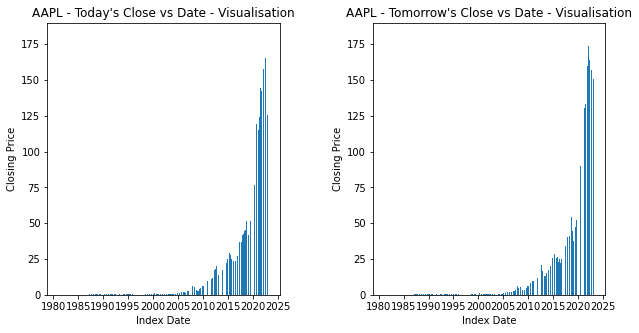

In [9]:
# create figure and axis objects
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# plot the data on each axis object
ax1.bar(AAPL.index, AAPL['Close'])
ax2.bar(AAPL.index, AAPL['Tomorrow'])

# set labels and title for each axis object
ax1.set_xlabel('Index Date')
ax1.set_ylabel('Closing Price')
ax1.set_title('AAPL - Today\'s Close vs Date - Visualisation')

ax2.set_xlabel('Index Date')
ax2.set_ylabel('Closing Price')
ax2.set_title('AAPL - Tomorrow\'s Close vs Date - Visualisation')

# adjust the space between the subplots
fig.subplots_adjust(wspace=0.4)

# display the plot
plt.show()

In [10]:
# Comparing columns "Tomorrow" and "Close" and adding new column "Target"
AAPL["Target"] = (AAPL["Tomorrow"]>AAPL["Close"]).astype(int)

In [11]:
AAPL

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099722,0.100155,0.099722,0.099722,469033600,0.094519,0
1980-12-15 00:00:00-05:00,0.094953,0.094953,0.094519,0.094519,175884800,0.087582,0
1980-12-16 00:00:00-05:00,0.088015,0.088015,0.087582,0.087582,105728000,0.089749,1
1980-12-17 00:00:00-05:00,0.089749,0.090183,0.089749,0.089749,86441600,0.092351,1
1980-12-18 00:00:00-05:00,0.092351,0.092785,0.092351,0.092351,73449600,0.097987,1
...,...,...,...,...,...,...,...
2023-05-01 00:00:00-04:00,169.279999,170.449997,168.639999,169.589996,52472900,168.539993,0
2023-05-02 00:00:00-04:00,170.089996,170.350006,167.539993,168.539993,48425700,167.449997,0
2023-05-03 00:00:00-04:00,169.500000,170.919998,167.160004,167.449997,65136000,165.789993,0


In [12]:
# Getting a copy of the dataframe from a specific date
AAPL = AAPL.loc["1990-01-01":].copy()

In [13]:
AAPL

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,0.250282,0.266257,0.248507,0.264482,183198400,0.266257,1
1990-01-03 00:00:00-05:00,0.269808,0.269808,0.266257,0.266257,207995200,0.267145,1
1990-01-04 00:00:00-05:00,0.271583,0.275132,0.264482,0.267145,221513600,0.268033,1
1990-01-05 00:00:00-05:00,0.268033,0.271583,0.262707,0.268033,123312000,0.269808,1
1990-01-08 00:00:00-05:00,0.266257,0.269808,0.262707,0.269808,101572800,0.267145,0
...,...,...,...,...,...,...,...
2023-05-01 00:00:00-04:00,169.279999,170.449997,168.639999,169.589996,52472900,168.539993,0
2023-05-02 00:00:00-04:00,170.089996,170.350006,167.539993,168.539993,48425700,167.449997,0
2023-05-03 00:00:00-04:00,169.500000,170.919998,167.160004,167.449997,65136000,165.789993,0


# Training an Initial Machine Learning Model

Random Forests work by training a bunch of individual decision trees with randomised parameters and then averaging the results from those decision trees.
So, Because of this process the RFs are resistant to overfitting when compared to other models.

They also run relatively quickly.

And they can pick up the non linear tendencies in the data.

#### n_estimators 
= Number of Individual Decision Trees we want to train. Higher the value, higher the accuracy. But, Only till a limit.
We gave it value 100...so that the training is done quickly for the project's sake

#### min_samples_split 
= This value helps us from overfitting. decision trees can result in overfitting if they are built too deeply. Higher the value, Lower the Accuracy, and Lower the overfitting.

#### Random_State 
= A parameter which can give us a predefined sequence of random numbers using the random seed.

In [14]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100,random_state=1)

train = AAPL.iloc[:-100]
test = AAPL.iloc[-100:]

predictors = ["Close","Volume","Open","High","Low"]
model.fit(train[predictors],train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [15]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [16]:
import pandas as pd

#Converting the preds array into a Series with the DateTime Index
preds = pd.Series(preds, index=test.index)

In [17]:
precision_score(test["Target"],preds)

0.5490196078431373

In [18]:
combined = pd.concat([test["Target"],preds],axis=1)

<Axes: xlabel='Date'>

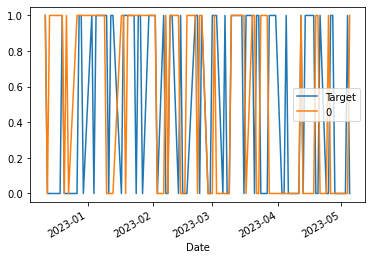

In [19]:
combined.plot()

# Building a BackTesting System

Currently we are only able to test against the last 100 days. But, if we are really building a stock price model in real world, then we need to be abe to test 
across multiple years.

So, we will do backtesting.

for this,we create a predict function

start - 2500 - 10 years of data to initially train our model.i.e., we want a certain number of years data to be trained by our first model.
we train for 10 years data and predict for eleventh year.
then we train for 11 years of data and predict for twelveth year.
And so on.


step - 250 - Since there are 250 days in a year for stock market.


all_predictions is a list containing the predictions of single years starting from the 11th year.. where each item is a dataframe.

function to loop across our data year by year.
split up our training and test data.
training set = all the years prior to the current year in the loop.
test set = the current year data
then predict
append our current year predictions to the all_predictors
And then combine all the dataframes to a single dataframe

In [20]:
def predict(train,test,predictors,model):
    model.fit(train[predictors],train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds,index=test.index,name="Predictions")
    combined = pd.concat([test["Target"],preds],axis=1)
    return combined

In [21]:
def backtest(data, model, predictors, start=2500,step=250):
    all_predictions=[]
    
    for i in range(start,data.shape[0],step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train,test,predictors,model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [22]:
predictions = backtest(AAPL,model,predictors)

In [23]:
predictions["Predictions"].value_counts()

Predictions
0    3962
1    1939
Name: count, dtype: int64

In [24]:
precision_score(predictions["Target"],predictions["Predictions"])

0.518824136152656

In [25]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.520759
0    0.479241
Name: count, dtype: float64

# Performing Backtesting with New Predictors

In [26]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = AAPL.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    AAPL[ratio_column] = AAPL["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    AAPL[trend_column] = AAPL.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]

In [27]:
AAPL = AAPL.dropna(subset=AAPL.columns[AAPL.columns != "Tomorrow"])

In [28]:
AAPL

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,0.216717,0.220421,0.214865,0.215791,293664000,0.220422,1,0.993604,1.0,0.978993,1.0,1.007241,22.0,0.694753,111.0,0.637248,462.0
1993-12-15 00:00:00-05:00,0.214865,0.220422,0.214865,0.220422,123883200,0.217643,0,1.010615,1.0,1.014493,2.0,1.025699,23.0,0.711548,111.0,0.651010,462.0
1993-12-16 00:00:00-05:00,0.218569,0.220421,0.214865,0.217643,126369600,0.218569,1,0.993658,1.0,1.005994,2.0,1.010468,22.0,0.704569,110.0,0.642898,461.0
1993-12-17 00:00:00-05:00,0.218569,0.220421,0.215791,0.218569,145152000,0.211160,0,1.002123,1.0,1.001698,3.0,1.011960,23.0,0.709636,110.0,0.645728,461.0
1993-12-20 00:00:00-05:00,0.216717,0.220421,0.209308,0.211160,189033600,0.203751,0,0.982758,1.0,0.974357,2.0,0.975652,22.0,0.687599,110.0,0.623946,460.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01 00:00:00-04:00,169.279999,170.449997,168.639999,169.589996,52472900,168.539993,0,0.999735,1.0,1.015254,2.0,1.077830,32.0,1.136451,129.0,1.426561,527.0
2023-05-02 00:00:00-04:00,170.089996,170.350006,167.539993,168.539993,48425700,167.449997,0,0.996895,0.0,1.003238,2.0,1.069539,31.0,1.129112,128.0,1.416258,527.0
2023-05-03 00:00:00-04:00,169.500000,170.919998,167.160004,167.449997,65136000,165.789993,0,0.996756,0.0,0.992390,2.0,1.060833,31.0,1.121737,127.0,1.405662,526.0


In [29]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [30]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [31]:
predictions = backtest(AAPL, model, new_predictors)

In [32]:
predictions["Predictions"].value_counts()

Predictions
0.0    4395
1.0     506
Name: count, dtype: int64

In [33]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5474308300395256

In [34]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.529892
0    0.470108
Name: count, dtype: float64

In [35]:
predictions

,Target,Predictions
Date,,
2003-11-14 00:00:00-05:00,0,0.0
2003-11-17 00:00:00-05:00,0,0.0
2003-11-18 00:00:00-05:00,1,0.0
2003-11-19 00:00:00-05:00,0,0.0
2003-11-20 00:00:00-05:00,0,0.0
...,...,...
2023-05-01 00:00:00-04:00,0,0.0
2023-05-02 00:00:00-04:00,0,0.0
2023-05-03 00:00:00-04:00,0,0.0
